In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

%matplotlib notebook

#configure plot style
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.fontsize'] = 12

def getRank(x):
    if ") " in x:
        return x.split(") ")[0][1:]
    return None

def stripRank(x):
    if ") " in x:
        return x.split(") ")[1]
    return x
#Load csv data for last five years
results_2013 = pd.read_csv("2013CFBResults.csv")
results_2014 = pd.read_csv("2014CFBResults.csv")
results_2015 = pd.read_csv("2015CFBResults.csv")
results_2016 = pd.read_csv("2016CFBResults.csv")
results_2017 = pd.read_csv("2017CFBResults.csv")
dataFiles = [results_2013, results_2014, results_2015, results_2016, results_2017]

#process rank files
for data in dataFiles:
    data["WinRank"] = data["Winner"].apply(getRank).apply(pd.to_numeric)
    data["Winner"] = data["Winner"].apply(stripRank)
    data["LoseRank"] = data["Loser"].apply(getRank).apply(pd.to_numeric)
    data["Loser"] = data["Loser"].apply(stripRank)

# Compress the data sets down into just season statistics for Pac 12 and Big Ten teams

In [233]:
pac12_teams = ['Stanford', 'Washington', 'Washington State', 'Oregon', 'California', 'Oregon State', 'Southern California', 'Arizona State', 'Arizona', 'UCLA', 'Utah', 'Colorado']
bigTen_teams = ["Ohio State", "Michigan State", "Penn State", "Michigan", "Rutgers", "Indiana", "Maryland", "Wisconsin", "Northwestern", "Iowa", "Purdue", "Nebraska", "Minnesota", "Illinois"]
results_2017[results_2017["Winner"] == "Ohio State"]

,Rk,Wk,Date,Time,Day,Winner,Pts,Unnamed: 7,Loser,Pts.1,TV,Notes,WinRank,LoseRank
13,14,2,Aug 31 2017,8:00 PM,Thu,Ohio State,49,@,Indiana,21,NaN,"Memorial Stadium ""The Rock"" - Bloomington Indiana",2.0,NaN
199,200,4,Sep 16 2017,4:30 PM,Sat,Ohio State,38,NaN,Army,7,NaN,Ohio Stadium - Columbus Ohio,8.0,NaN
260,261,5,Sep 23 2017,12:00 PM,Sat,Ohio State,54,NaN,Nevada-Las Vegas,21,NaN,Ohio Stadium - Columbus Ohio,10.0,NaN
324,325,6,Sep 30 2017,7:30 PM,Sat,Ohio State,56,@,Rutgers,0,NaN,High Point Solutions Stadium - Piscataway New ...,11.0,NaN
376,377,7,Oct 7 2017,4:00 PM,Sat,Ohio State,62,NaN,Maryland,14,NaN,Ohio Stadium - Columbus Ohio,10.0,NaN
438,439,8,Oct 14 2017,7:30 PM,Sat,Ohio State,56,@,Nebraska,14,NaN,Memorial Stadium - Lincoln Nebraska,9.0,NaN
552,553,10,Oct 28 2017,3:30 PM,Sat,Ohio State,39,NaN,Penn State,38,NaN,Ohio Stadium - Columbus Ohio,6.0,2.0
670,671,12,Nov 11 2017,12:00 PM,Sat,Ohio State,48,NaN,Michigan State,3,NaN,Ohio Stadium - Columbus Ohio,11.0,13.0
733,734,13,Nov 18 2017,3:30 PM,Sat,Ohio State,52,NaN,Illinois,14,NaN,Ohio Stadium - Columbus Ohio,11.0,NaN
801,802,14,Nov 25 2017,12:00 PM,Sat,Ohio State,31,@,Michigan,20,NaN,Michigan Stadium - Ann Arbor Michigan,8.0,NaN


In [241]:
season_stats = pd.DataFrame(columns=['Year', 'Conference','Team', 'Wins', 'Losses', 'Weeks Ranked', 'Highest Rank', 'PtsFor', 'PtsAllowed', 'Cross-Conference Wins', 'Cross-Conference Losses'])
seasons = [2013, 2014, 2015, 2016, 2017]
for i, data in enumerate(dataFiles):
    season = seasons[i]
    for team in bigTen_teams:
        conference = "Big Ten"
#         print("----------------")
        wins = len(data[data["Winner"] == team])
        losses = len(data[data["Loser"] == team])
#         print(team + ": " + str(wins) + "-" + str(losses))
        weeksRanked = data["WinRank"][data["Winner"] == team].count() + data["LoseRank"][data["Loser"] == team].count()
        games = data[(data["Winner"] == team) | (data["Loser"] == team)]
#         print(games[["Winner", "WinRank", "Loser", "LoseRank"]])
        ranks = []
        cross_conf_wins = 0
        cross_conf_losses = 0
        for index, game in games.iterrows():
            if game["Winner"] == team:
                rank = game["WinRank"]
                if game["Loser"] in pac12_teams:
                    cross_conf_wins += 1
            else:
                rank = game["LoseRank"]
                if game["Winner"] in pac12_teams:
                    cross_conf_losses += 1
            ranks.append(rank)
#         print(ranks)
        bestRank = np.nanmin(ranks)
#         print("Weeks Ranked: " + str(weeksRanked) + "/Best Rank: " + str(bestRank))
        ptsFor = data["Pts"][data["Winner"] == team].sum() + data["Pts.1"][data["Loser"] == team].sum()
        ptsAllowed = data["Pts.1"][data["Winner"] == team].sum() + data["Pts"][data["Loser"] == team].sum()
#         print("Pts Scored: " + str(ptsFor) + "/Pts Allowed: " + str(ptsAllowed))
#         print("Record against Pac-12: " + str(cross_conf_wins) + "-" + str(cross_conf_losses))
        rowData = [season, conference, team, wins, losses, weeksRanked, bestRank, ptsFor, ptsAllowed, cross_conf_wins, cross_conf_losses]
        row = pd.Series(rowData, index=['Year', 'Conference','Team', 'Wins', 'Losses', 'Weeks Ranked', 'Highest Rank', 'PtsFor', 'PtsAllowed', 'Cross-Conference Wins', 'Cross-Conference Losses'])
#         print(row)
        season_stats = season_stats.append(row, ignore_index=True)
    for team in pac12_teams:
        conference = "Pac 12"
        wins = len(data[data["Winner"] == team])
        losses = len(data[data["Loser"] == team])
        weeksRanked = data["WinRank"][data["Winner"] == team].count() + data["LoseRank"][data["Loser"] == team].count()
        games = data[(data["Winner"] == team) | (data["Loser"] == team)]
        ranks = []
        cross_conf_wins = 0
        cross_conf_losses = 0
        for index, game in games.iterrows():
            if game["Winner"] == team:
                rank = game["WinRank"]
                if game["Loser"] in bigTen_teams:
                    cross_conf_wins += 1
            else:
                rank = game["LoseRank"]
                if game["Winner"] in bigTen_teams:
                    cross_conf_losses += 1
            ranks.append(rank)
        bestRank = np.nanmin(ranks)
        ptsFor = data["Pts"][data["Winner"] == team].sum() + data["Pts.1"][data["Loser"] == team].sum()
        ptsAllowed = data["Pts.1"][data["Winner"] == team].sum() + data["Pts"][data["Loser"] == team].sum()
#         print("Pts Scored: " + str(ptsFor) + "/Pts Allowed: " + str(ptsAllowed))
#         print("Record against Pac-12: " + str(cross_conf_wins) + "-" + str(cross_conf_losses))
        rowData = [season, conference, team, wins, losses, weeksRanked, bestRank, ptsFor, ptsAllowed, cross_conf_wins, cross_conf_losses]
        row = pd.Series(rowData, index=['Year', 'Conference','Team', 'Wins', 'Losses', 'Weeks Ranked', 'Highest Rank', 'PtsFor', 'PtsAllowed', 'Cross-Conference Wins', 'Cross-Conference Losses'])
#         print(row)
        season_stats = season_stats.append(row, ignore_index=True)
    
season_stats["Wins"] = pd.to_numeric(season_stats["Wins"], errors="coerce")
season_stats["Losses"] = pd.to_numeric(season_stats["Losses"], errors="coerce")
season_stats["Weeks Ranked"] = pd.to_numeric(season_stats["Weeks Ranked"], errors="coerce")
season_stats["Cross-Conference Wins"] = pd.to_numeric(season_stats["Cross-Conference Wins"], errors="coerce")
season_stats["Cross-Conference Losses"] = pd.to_numeric(season_stats["Cross-Conference Losses"], errors="coerce")

season_stats["Losses"].dtype

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: All-NaN axis encountered
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: All-NaN axis encountered


dtype('int64')

# Create Visualizations
## Create conference-level visualizations to compare the Pac-12 and Big Ten over past 5 seasons
In order to compare the two conferences, I am going to look at how the conferences average wins, number of teams ranked and top ten teams to see if I can get a picture of which conference has the stronger football presence.  I will also calculate the overall cross-conference record.

<IPython.core.display.Javascript object>


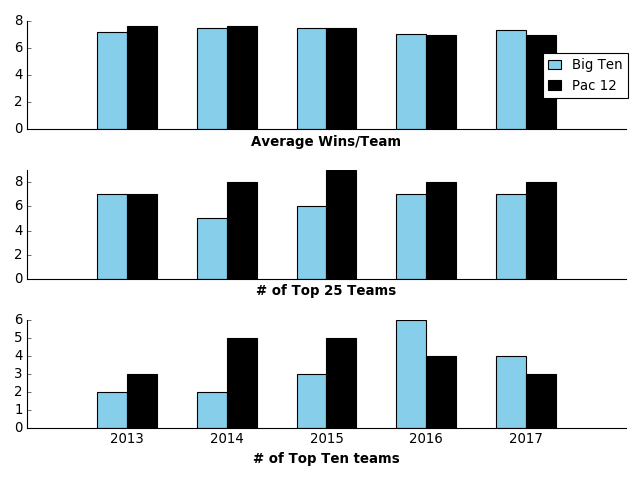

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [288]:
#Build side-by-side bar charts for each year to compare conference average wins
bigTen_wins = season_stats[["Wins", "Year"]][season_stats["Conference"] == "Big Ten"].groupby(["Year"]).mean()["Wins"]
pac12_wins = season_stats[["Wins", "Year"]][season_stats["Conference"] == "Pac 12"].groupby(["Year"]).mean()["Wins"]

f, (ax, ax2, ax3) = plt.subplots(3,1)
ax.bar([x - 0.3 for x in seasons], bigTen_wins, color="skyblue", width=.3, label="Big Ten")
ax.bar([x for x in seasons], pac12_wins, color="black", width=.3, label="Pac 12")
# ax.axes.get_xaxis().set_visible(False)
ax.set_xticks([])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(loc='center left', bbox_to_anchor=(0.85, 0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_ticks_position('left')
ax.set_axis_bgcolor('white')
ax.set_xlabel("Average Wins/Team")

#Build side-by-side bar charts for # of ranked teams
bigTen_teams_ranked = season_stats[["Weeks Ranked", "Year"]][season_stats["Weeks Ranked"] > 0][season_stats["Conference"] == "Big Ten"].groupby(["Year"]).count()["Weeks Ranked"]
pac12_teams_ranked = season_stats[["Weeks Ranked", "Year"]][season_stats["Weeks Ranked"] > 0][season_stats["Conference"] == "Pac 12"].groupby(["Year"]).count()["Weeks Ranked"]
ax2.bar([x - 0.3 for x in seasons], bigTen_teams_ranked, color="skyblue", width=.3, label="Big Ten")
ax2.bar([x for x in seasons], pac12_teams_ranked, color="black", width=.3, label="Pac 12")
# ax2.axes.get_xaxis().set_visible(False)
ax2.set_xticks([])
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_ticks_position('left')
ax2.set_xlabel("# of Top 25 Teams")

#build side-by-side bar charts for # top ten teams
bigTen_top_ten = season_stats[["Highest Rank", "Year"]][season_stats["Highest Rank"] <= 10][season_stats["Conference"] == "Big Ten"].groupby(["Year"]).count()["Highest Rank"]
pac12_top_ten = season_stats[["Highest Rank", "Year"]][season_stats["Highest Rank"] <= 10][season_stats["Conference"] == "Pac 12"].groupby(["Year"]).count()["Highest Rank"]
ax3.bar([x - 0.3 for x in seasons], bigTen_top_ten, color="skyblue", width=.3, label="Big Ten")
ax3.bar([x for x in seasons], pac12_top_ten, color="black", width=.3, label="Pac 12")
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')
ax3.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(seasons, seasons)
ax3.set_xlabel("# of Top Ten teams")

f.tight_layout()
plt.savefig('Pac12_v_BigTen.png')
plt.show()

In [289]:
#Calculate the overall record between the two conferences in cross-conference games:
season_stats[["Cross-Conference Wins", "Cross-Conference Losses", "Year"]][season_stats["Conference"] == "Big Ten"].groupby(["Year"]).sum()

,Cross-Conference Wins,Cross-Conference Losses
Year,,
2013,3,3
2014,2,6
2015,5,3
2016,4,3
2017,5,2
